### 노인 보호구역 내 cctv가 의무가 아니다.
노인보호구역 500M 내 보행자 사고 다발지역 cctv 보유현황    
최근 3년 발생한 보행자 사망, 중상 교통사고를 대상사고로 하며, 사고다발지역 선정 조건은 반경 100m 내 대상사고 7건 이상 발생지역

### 노인 보호구역 CCTV 비율

In [46]:
# 노인 보호구역 CCTV 비율
cctv_ratio_sql = """
SELECT 
count(*) AS total_senior_safety_zone,
SUM(IF (cctv = True, 1,0)) AS cctv_zone

FROM
`moonlit-vine-428804-p9.semi_project.old_safety_zone_1` AS old_safety_zone

"""

In [47]:
cctv_ratio_df = client.query(cctv_ratio_sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [48]:
cctv_ratio_df.set_index("cctv_zone")

,total_senior_safety_zone
cctv_zone,
594,3097


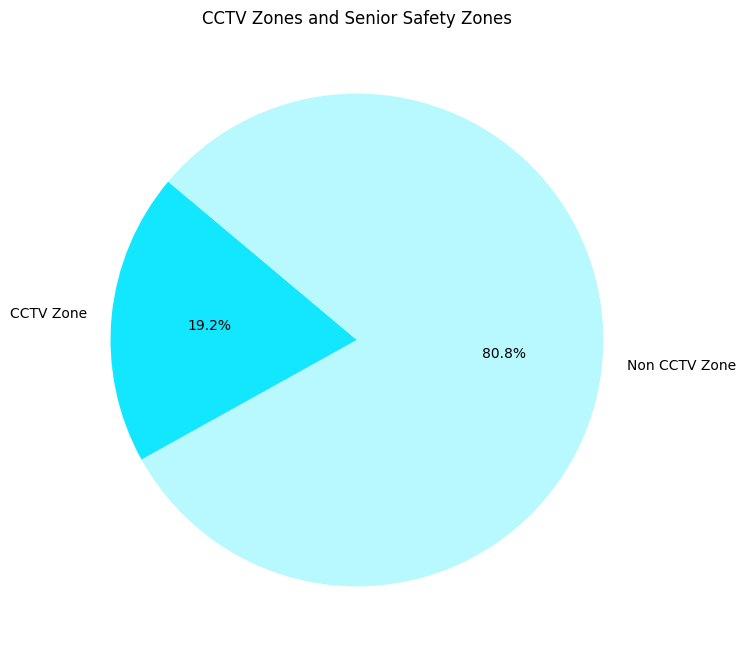

In [67]:
total_senior_safety_zone = 3097
cctv_zone = 594
non_cctv_zone = total_senior_safety_zone - cctv_zone

# 라벨과 값 설정
labels = ['CCTV Zone', 'Non CCTV Zone']
values = [cctv_zone, non_cctv_zone]

# 파이 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
colors = ['#12e7ff', '#b8f8ff']
# 제목 추가
plt.title('CCTV Zones and Senior Safety Zones')

# 그래프 보여주기
plt.show()

In [108]:
# 사고가 많은 지역에 cctv는 필수적으로 설치 되었을까?
sql = """
SELECT 
    facility AS cctv_having, 
    latitude, 
    longitude

FROM `moonlit-vine-428804-p9.semi_project.old_safety_zone_1`

WHERE cctv = True
"""

In [109]:
old_safety_zone_cctv_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


### 전국 노인보호구역 500M 내 보행자 사고 다발지역 cctv 보유현황

In [29]:
#전국 노인보호구역 500M 내 보행자 사고 다발지역 cctv 보유현황
import matplotlib.pyplot as plt
sql = """
SELECT
  count(*) AS total_accidents_within_500m,
  SUM(CASE WHEN (dth_dnv_cnt + se_dnv_cnt) <= 7 THEN 1 ELSE 0 END) AS accident_prone_areas,
  SUM(CASE WHEN (cctv = TRUE) AND (dth_dnv_cnt + se_dnv_cnt) <= 7 THEN 1 ELSE 0 END) AS accident_prone_areas_cctv,
  SUM(CASE WHEN (cctv = FALSE) AND (dth_dnv_cnt + se_dnv_cnt) <= 7 THEN 1 ELSE 0 END) AS accident_prone_areas_no_cctv
FROM `moonlit-vine-428804-p9.semi_project.by_region_accidents_within_500m` 
"""

In [30]:
accident_prone_areas_cctv_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [31]:
accident_prone_areas_cctv_df


,total_accidents_within_500m,accident_prone_areas,accident_prone_areas_cctv,accident_prone_areas_no_cctv
0,1521,1494,628,866


### 서울 노인보호구역 500M 내 보행자 사고 다발지역 cctv 보유현황

In [13]:
#서울 노인보호구역 500M 내 보행자 사고 다발지역 cctv 보유현황

sql = """
SELECT
  count(*) AS total_accidents_within_500m,
  SUM(CASE WHEN (dth_dnv_cnt + se_dnv_cnt) <= 7 THEN 1 ELSE 0 END) AS accident_prone_areas,
  SUM(CASE WHEN (cctv = TRUE) AND (dth_dnv_cnt + se_dnv_cnt) <= 7 THEN 1 ELSE 0 END) AS accident_prone_areas_cctv,
  SUM(CASE WHEN (cctv = FALSE) AND (dth_dnv_cnt + se_dnv_cnt) <= 7 THEN 1 ELSE 0 END) AS accident_prone_areas_no_cctv
FROM `moonlit-vine-428804-p9.semi_project.by_region_accidents_within_500m` 

WHERE
  si = "서울특별시"
"""

In [14]:
accident_prone_areas_cctv_seoul_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [15]:
accident_prone_areas_cctv_seoul_df

,total_accidents_within_500m,accident_prone_areas,accident_prone_areas_cctv,accident_prone_areas_no_cctv
0,415,405,241,164


### CCTV 사고발생수/cctv 설치 수 scatter

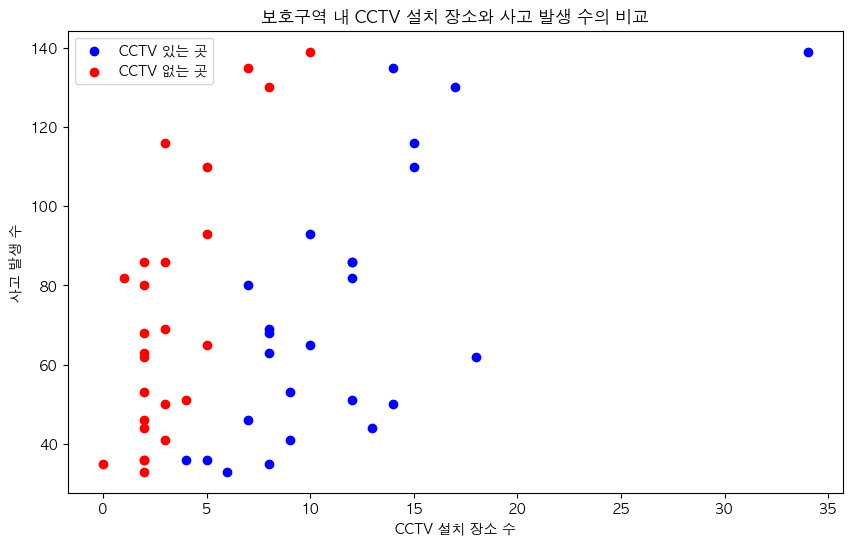

In [268]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df_merged['cctv_loc_cnt'], final_df_merged['occrrnc_cnt_500_cnt'], label='CCTV 있는 곳', color='b')
plt.scatter(final_df_merged['no_cctv_loc_cnt'], final_df_merged['occrrnc_cnt_500_cnt'], label='CCTV 없는 곳', color='r')

plt.xlabel('CCTV 설치 장소 수')
plt.ylabel('사고 발생 수')
plt.title('보호구역 내 CCTV 설치 장소와 사고 발생 수의 비교')
plt.legend()
plt.show()

In [150]:
sql = """
SELECT
*
FROM ``moonlit-vine-428804-p9.semi_project.by_region_accidents_within_500m`
WHERE sido_sgg_nm LIKE '서울특별시%'
"""

In [151]:
accident_seoul_500_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [152]:
accident_seoul_500_df["sido_sgg_nm"] = accident_seoul_df["sido_sgg_nm"].str.replace(r'서울특별시\s*([가-힣]+구)\d*', r'\1', regex=True)

In [154]:
classification_accident_500_df = accident_seoul_500_df.groupby('sido_sgg_nm')['occrrnc_cnt'].sum().reset_index()

In [156]:
cnt_gu_accident_loc_df = accident_seoul_500_df.groupby('sido_sgg_nm')['occrrnc_cnt'].count().reset_index()

In [157]:
cnt_gu_accident_loc_df.rename(columns={'sido_sgg_nm': 'sido_sgg_nm', 'occrrnc_cnt': 'accident_loc_500_cnt'}, inplace=True)

In [159]:
occrrnc_cnt = classification_accident_500_df[['occrrnc_cnt']]

In [160]:
occrrnc_cnt.rename(columns={'occrrnc_cnt': 'occrrnc_cnt_500_cnt'}, inplace=True)

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_15696/117168570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occrrnc_cnt.rename(columns={'occrrnc_cnt': 'occrrnc_cnt_500_cnt'}, inplace=True)


In [162]:
result_500_df = pd.concat([cnt_gu_accident_loc_df.reset_index(drop=True), occrrnc_cnt.reset_index(drop=True)], axis=1)

In [180]:
df_merged = pd.merge(result_df, result_500_df, on='sido_sgg_nm')

In [190]:
df_merged.set_index("sido_sgg_nm")

,accident_loc_cnt,occrrnc_cnt,accident_loc_500_cnt,occrrnc_cnt_500_cnt
sido_sgg_nm,,,,
강남구,25,94,13,65
강동구,53,218,18,68
강북구,77,342,19,93
강서구,50,204,13,50
관악구,80,342,26,110
광진구,19,70,9,33
구로구,52,204,15,82
금천구,34,143,10,46
노원구,48,182,19,86


In [195]:
sql = """
SELECT
*
FROM `moonlit-vine-428804-p9.semi_project.by_region_accidents_within_500m`
WHERE sido_sgg_nm LIKE '서울특별시%'
    AND cctv = True
"""

In [196]:
cctv_seoul_500_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [209]:
cctv_seoul_500_df["sido_sgg_nm"] = accident_seoul_df["sido_sgg_nm"].str.replace(r'서울특별시\s*([가-힣]+구)\d*', r'\1', regex=True)

In [216]:
cctv_seoul_500_cntdf = cctv_seoul_500_df.groupby('sido_sgg_nm')['cctv_cnt'].count().reset_index()

In [220]:
cctv_seoul_500_cnt_df.rename(columns={'sido_sgg_nm': 'sido_sgg_nm', 'cctv_cnt': 'cctv_loc_cnt'}, inplace=True)

In [229]:
sql = """
SELECT
*
FROM `moonlit-vine-428804-p9.semi_project.by_region_accidents_within_500m`
WHERE sido_sgg_nm LIKE '서울특별시%'
    AND cctv = False
"""

In [230]:
no_cctv_seoul_500_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [231]:
no_cctv_seoul_500_df["sido_sgg_nm"] = accident_seoul_df["sido_sgg_nm"].str.replace(r'서울특별시\s*([가-힣]+구)\d*', r'\1', regex=True)

In [232]:
no_cctv_seoul_500_cnt_df = no_cctv_seoul_500_df.groupby('sido_sgg_nm')['cctv_cnt'].count().reset_index()

In [233]:
no_cctv_seoul_500_cnt_df.rename(columns={'sido_sgg_nm': 'sido_sgg_nm', 'cctv_cnt': 'no_cctv_loc_cnt'}, inplace=True)

In [234]:
no_cctv_loc_cnt_df = no_cctv_seoul_500_cnt_df[['no_cctv_loc_cnt']]

In [239]:
cctv_df_merged =  pd.concat([cctv_seoul_500_cnt_df.reset_index(drop=True), no_cctv_loc_cnt_df.reset_index(drop=True)], axis=1)

In [241]:
final_df_merged = pd.merge(df_merged, cctv_df_merged, on='sido_sgg_nm')

In [242]:
final_df_merged

,sido_sgg_nm,accident_loc_cnt,occrrnc_cnt,accident_loc_500_cnt,occrrnc_cnt_500_cnt,cctv_loc_cnt,no_cctv_loc_cnt
0,강남구,25,94,13,65,10.0,5
1,강동구,53,218,18,68,8.0,2
2,강북구,77,342,19,93,10.0,5
3,강서구,50,204,13,50,14.0,3
4,관악구,80,342,26,110,15.0,5
5,광진구,19,70,9,33,6.0,2
6,구로구,52,204,15,82,12.0,1
7,금천구,34,143,10,46,7.0,2
8,노원구,48,182,19,86,12.0,2
9,도봉구,51,194,17,86,12.0,3


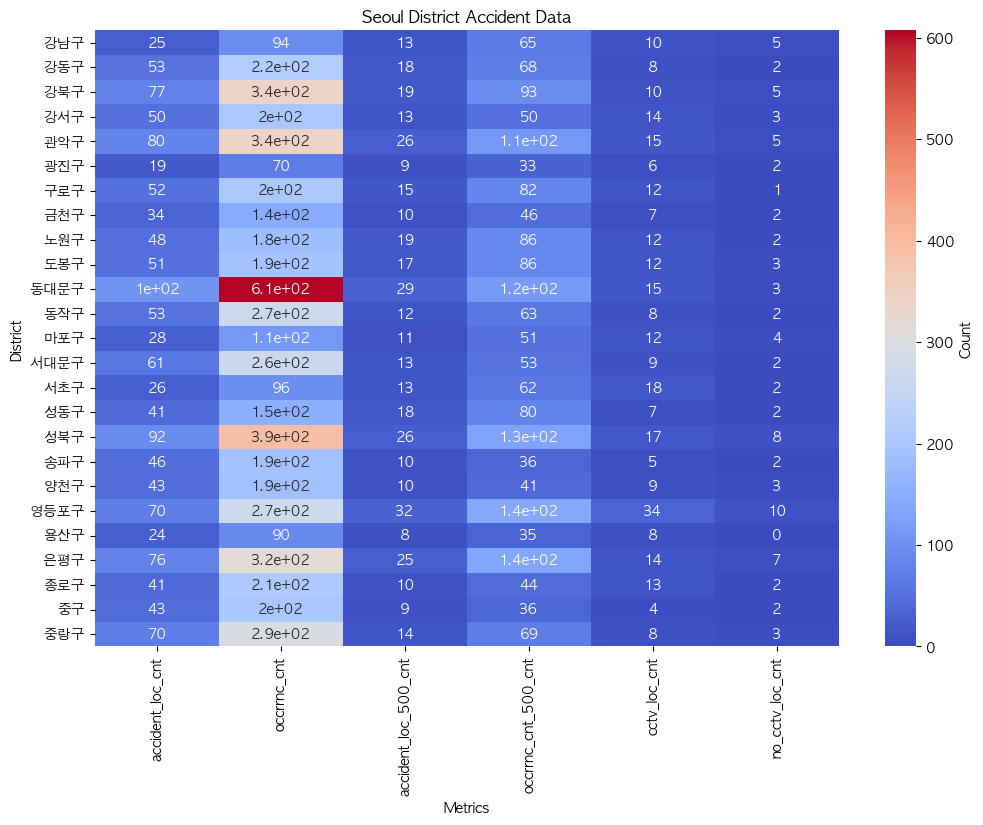

In [243]:
import seaborn as sns
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12, 8))
sns.heatmap(final_df_merged.set_index('sido_sgg_nm').astype(float), annot=True, cmap='coolwarm', cbar_kws={'label': 'Count'})
plt.title('Seoul District Accident Data')
plt.ylabel('District')
plt.xlabel('Metrics')
plt.show()

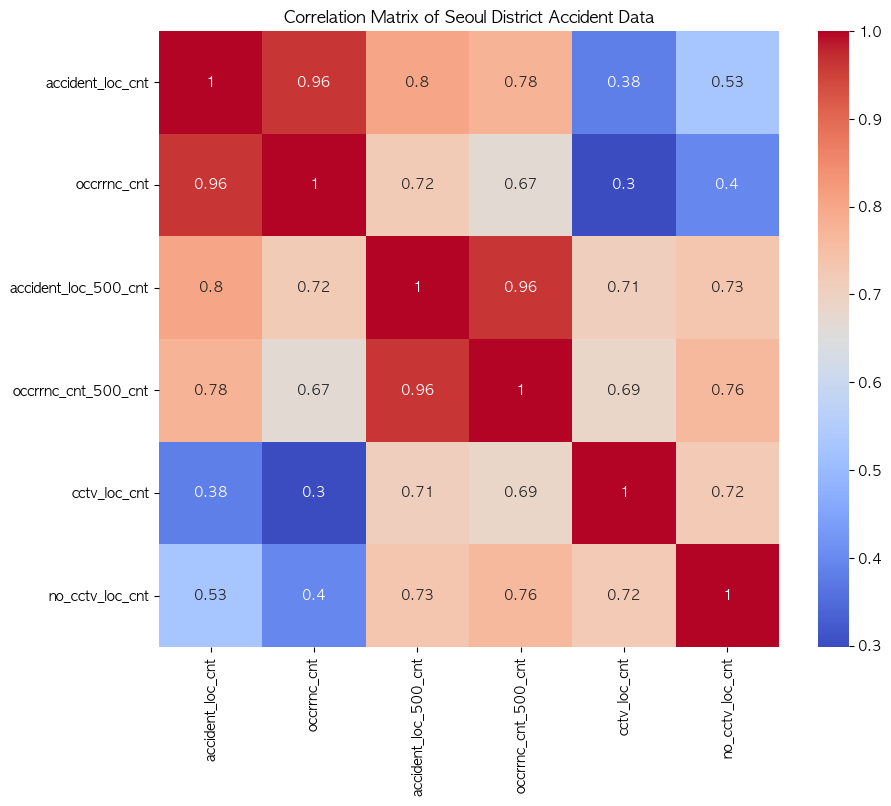

In [247]:
numeric_df = final_df_merged.drop(columns=['sido_sgg_nm'])
corr_matrix = numeric_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Seoul District Accident Data')
plt.show()